In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
model=tf.keras.models.load_model('/Users/withmocha/Desktop/VisualStudioCode/Capstone Design project/sentence base/model/saved model/0408/LSTM_model.h5')

2024-04-08 21:37:58.075338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-08 21:37:58.076750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-08 21:37:58.077180: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 384, 64)           16896     
                                                                 
 dropout_2 (Dropout)         (None, 384, 64)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 83,073
Trainable params: 83,073
Non-trainable params: 0
__________________________________________________

In [4]:
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/model train & test data(0408)/train_data_after_vector(0408).csv")
data_row.drop(columns=['Unnamed: 0'],inplace=True)
data_row.drop(columns=['predict'],inplace=True)
x_train=pd.DataFrame(data_row)

In [5]:


x_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/target/after vector/test data/x_target.csv")
y_test=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/transformed/target/after vector/test data/y_target.csv")

x_test.drop(columns=['Unnamed: 0'],inplace=True)
y_test.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test set에는 transform만 사용하기

In [7]:
x_test

array([[0.56939166, 0.30354251, 0.68919291, ..., 0.41374115, 0.44845679,
        0.60718666],
       [0.56001424, 0.44883435, 0.56270251, ..., 0.52650105, 0.33586613,
        0.58747794],
       [0.60217242, 0.37726118, 0.52171774, ..., 0.53587668, 0.32755366,
        0.52906388],
       ...,
       [0.57927762, 0.33876978, 0.65787938, ..., 0.50161222, 0.35549294,
        0.49117701],
       [0.59211114, 0.36182323, 0.66998905, ..., 0.58884266, 0.33200124,
        0.48485149],
       [0.42699456, 0.48409778, 0.63885984, ..., 0.61733981, 0.33322024,
        0.5393481 ]])

In [8]:
x_test = tf.cast(x_test, tf.float32)

In [9]:
x_test = tf.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [10]:
pred = model.predict(x_test)

2024-04-08 21:40:26.056146: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-08 21:40:26.183926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-08 21:40:26.184636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-08 21:40:26.185337: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

38/38 [==============================] - 2s 39ms/step


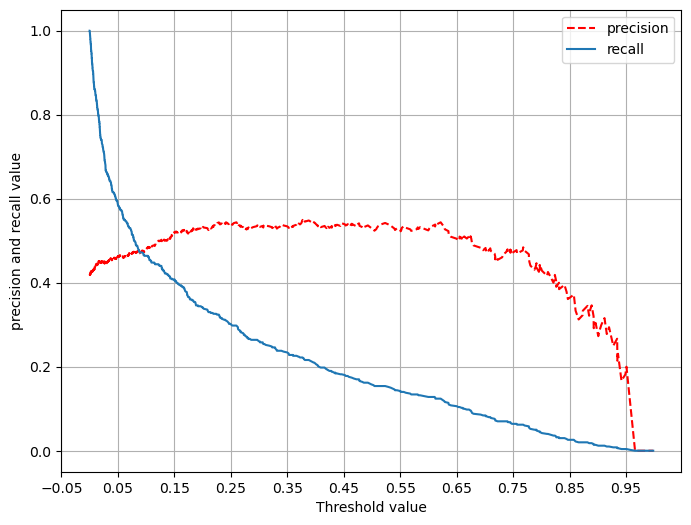

In [13]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sklearn.metrics as metrics
import numpy as np
def precision_recall_curve_plot(y_test,pred):
    precisions, recalls,thresholds = precision_recall_curve(y_test,pred)
    
    plt.figure(figsize=(8,6))
    threshold_index = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_index],'r--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_index],label='recall')
    
    start,end = plt.xlim()
    plt.xticks(np.around(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('precision and recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,pred)

In [14]:
precisions, recalls,thresholds = precision_recall_curve(y_test,pred)

In [16]:
len(precisions)

1193

In [15]:
for i in range(len(precisions)):
    if recalls[i]<=precisions[i]:
        thresholds_fit=thresholds[i]
        break
    
print(i)

692


In [17]:
thresholds_fit

0.09020771

In [18]:
pred

array([[0.07477983],
       [0.05246484],
       [0.00552895],
       ...,
       [0.13813394],
       [0.04415547],
       [0.47766024]], dtype=float32)

In [19]:
y_pred=pred.reshape(-1)
threshold = thresholds_fit
pred = (y_pred >= threshold)

In [23]:
len(pred)

1195

In [21]:
y_test=np.array(y_test['predict'])

In [24]:
y_test

array([1, 1, 0, ..., 0, 0, 1])

In [25]:
from sklearn.metrics import accuracy_score

accuracy_test= accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy_test}')

Accuracy: 0.5581589958158996
